# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

# Importing Libraries

In [622]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error,roc_curve,precision_recall_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Importing and loading dataset

In [623]:
loan=pd.read_csv("loan_prediction.csv")


In [624]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


loading first 5 rows

In [625]:
loan.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002317,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [626]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there are total of 614 rows and 13 columns

there are null values present which can be confirmed again/

In [627]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are few columns with null values which can be treated further

In [628]:
num_features = loan.select_dtypes(include = ['int64', 'float64']).columns
cat_features = loan.iloc[:, 0:12].select_dtypes(include = ['object']).columns

print("Numerical features:", num_features)
print("\nCategorical features:", cat_features)

Numerical features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Categorical features: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


 differciating columns in numnerical and categorical  types, for future use
 

# Univariate analysis

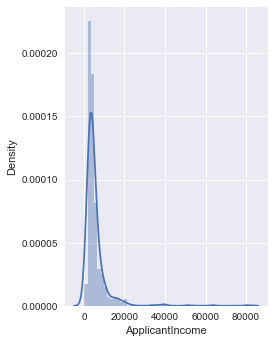

In [629]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['ApplicantIncome']);
plt.show();

we can observe that the above distribution is heavily skewed with most of the value is in the left side having some outlier values towards higher income side.

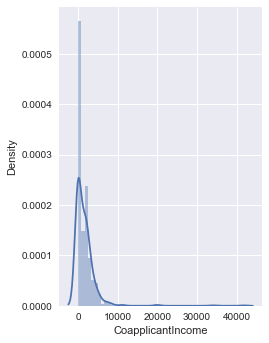

In [630]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['CoapplicantIncome']);
plt.show();

we can conclude that above distribution is heavily skewed with most of the value is in the left side 

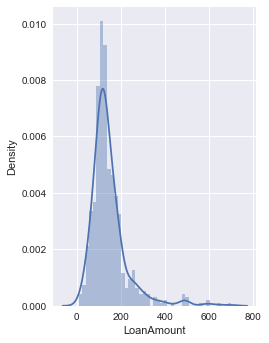

In [631]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['LoanAmount'].dropna());

 we can conclude that the above distribution is mildly normal one

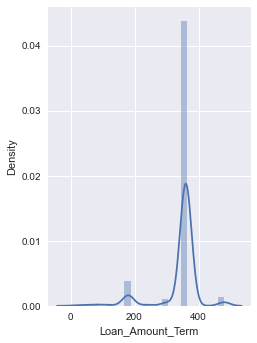

In [632]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['Loan_Amount_Term'].dropna());

plt.show();

we can conclude that the above distribution is bimodal with values centered around 380 and ~180.

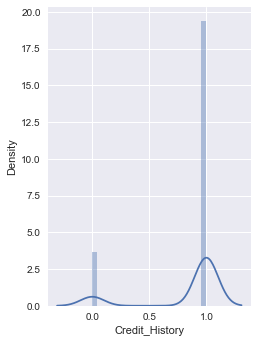

In [633]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['Credit_History'].dropna());
plt.show();

The nature of the above variable is binary with most of loan applicant having credit history equal to 1.

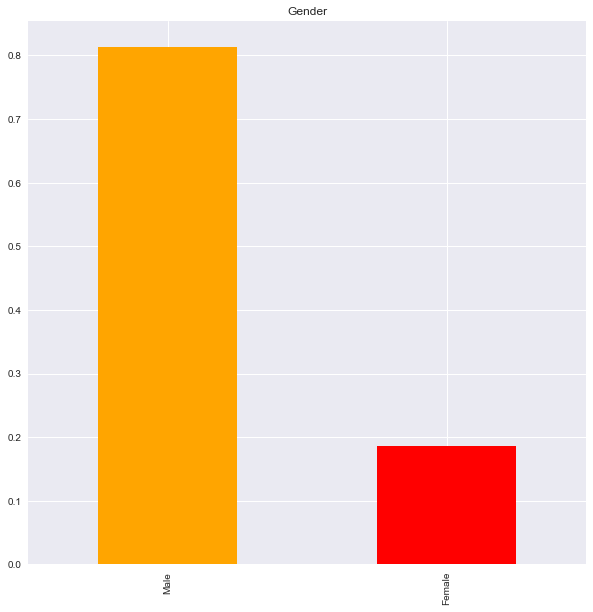

In [634]:
plt.figure(1)
plt.subplot(111)
loan['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= 'Gender',color=['orange', 'red'])

plt.show()

The above plot shows that the male applicants are more than female applicant

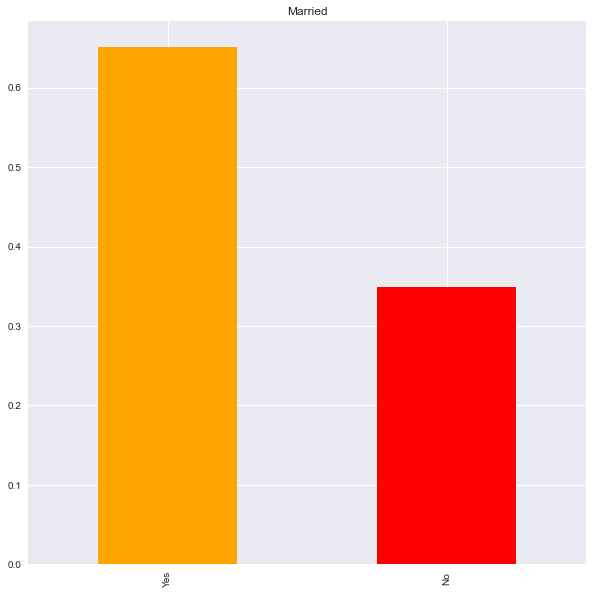

In [635]:
plt.figure(1)

plt.subplot(111)
loan['Married'].value_counts(normalize=True).plot.bar(figsize=(10,10),title= 'Married',color=['orange', 'red'])

plt.show()

The above onservation shows that the number of married applicants are more than number of unmarried applicants.

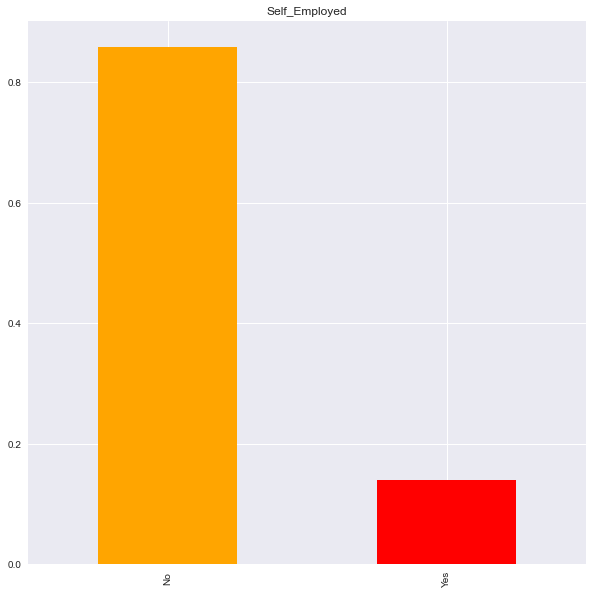

In [636]:
plt.figure(1)


plt.subplot(111)
loan['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,10),title= 'Self_Employed',color=['orange', 'red'])

plt.show()

The above onservation shows that the number of self-employed applicants are less than number of other applicants.

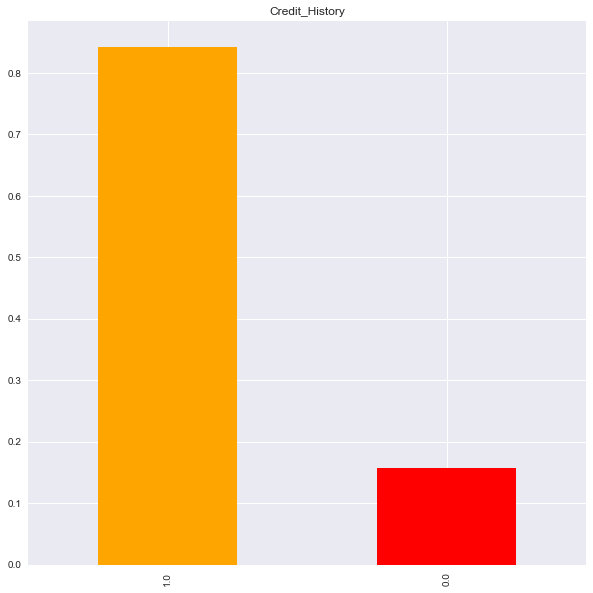

In [637]:
plt.figure(1)

plt.subplot(111)
loan['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,10),title= 'Credit_History',color=['orange', 'red'])

plt.show()

The above onservation shows that the number of applicants with credit history 1.0 are more than number of other applicants.

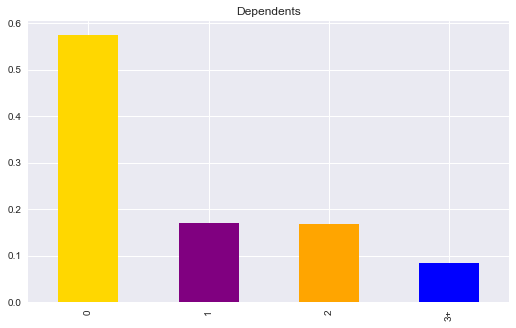

In [638]:
plt.figure(1)
plt.subplot(555)
loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(50,30),title= 'Dependents',color=['gold', 'purple','orange','blue'])

plt.show()

The above observation shows the applicants with 0 dependents are more and applicants with 3+ dependents are less than any other applicants 

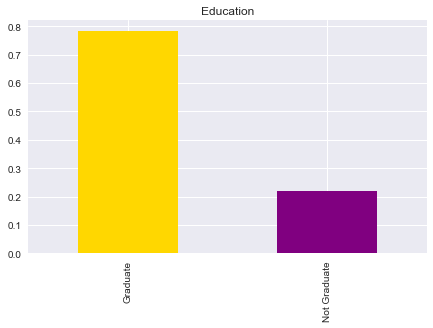

In [639]:
plt.figure(1)
plt.subplot(666)
loan['Education'].value_counts(normalize=True).plot.bar(figsize=(50,30),title= 'Education',color=['gold', 'purple','orange','blue'])
plt.show()

The above onservation shows that the number of graduate applicants are more than number of non graduate applicants.

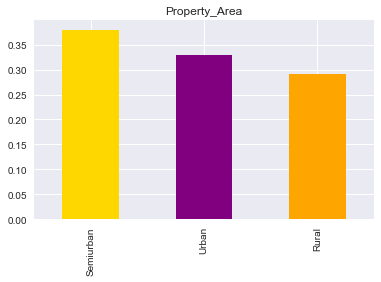

In [640]:
plt.figure(1)
plt.subplot(777)
loan['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(50,30),title= 'Property_Area',color=['gold', 'purple','orange','blue'])
plt.show()

The above observation shows the applicants from semiurban are more and applicants from rural area are less than any other applicants 

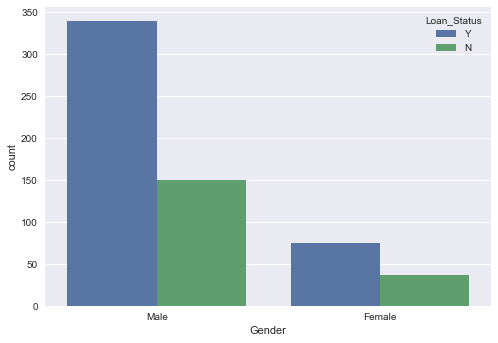

In [641]:
sns.countplot(loan['Gender'], hue=loan['Loan_Status'])
plt.show()




the loan approval for male is more than female

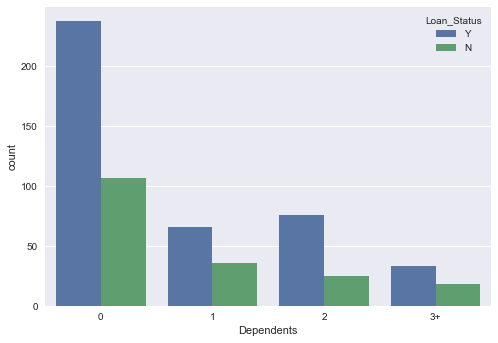

In [642]:
sns.countplot(loan['Dependents'], hue=loan['Loan_Status'])
plt.show()



the loan approval chances are more for applicants with 0 dependencies and extremely less for 3+ dependencies

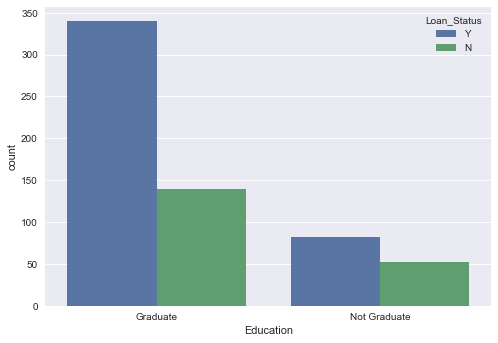

In [643]:
sns.countplot(loan['Education'], hue=loan['Loan_Status'])
plt.show()



the loan approval chances are more for graduate applicants with extremely less not graduate

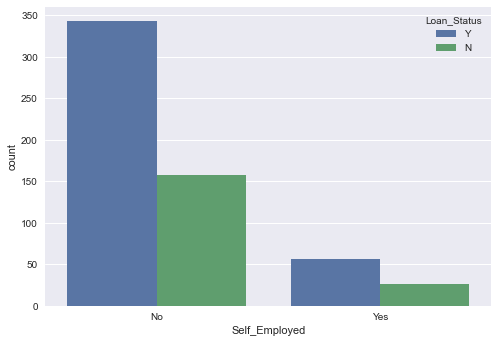

In [644]:
sns.countplot(loan['Self_Employed'], hue=loan['Loan_Status'])
plt.show()



The above onservation shows that the approval chances of self-employed applicants are less than number of other applicants.

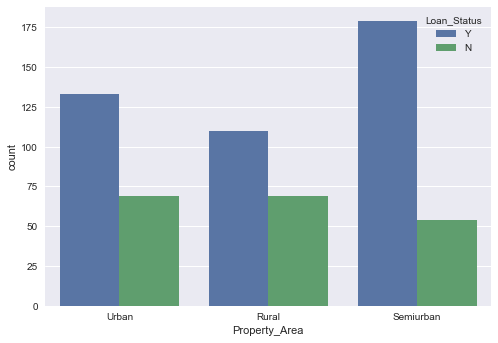

In [645]:
sns.countplot(loan['Property_Area'], hue=loan['Loan_Status'])
plt.show()

The above observation shows the applicants from semiurban have more chances to get loan than other applicants 

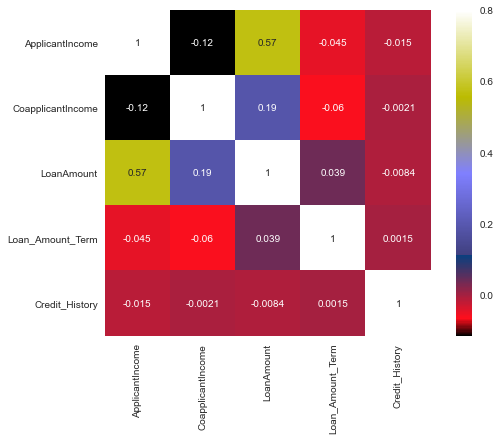

In [646]:
corr_matrix = loan[num_features].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="gist_stern");

The above observation shows the correlation between major numerical values

In [647]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)

replacing nan values with mean and mode 

# Looking for Outliers

<AxesSubplot:>

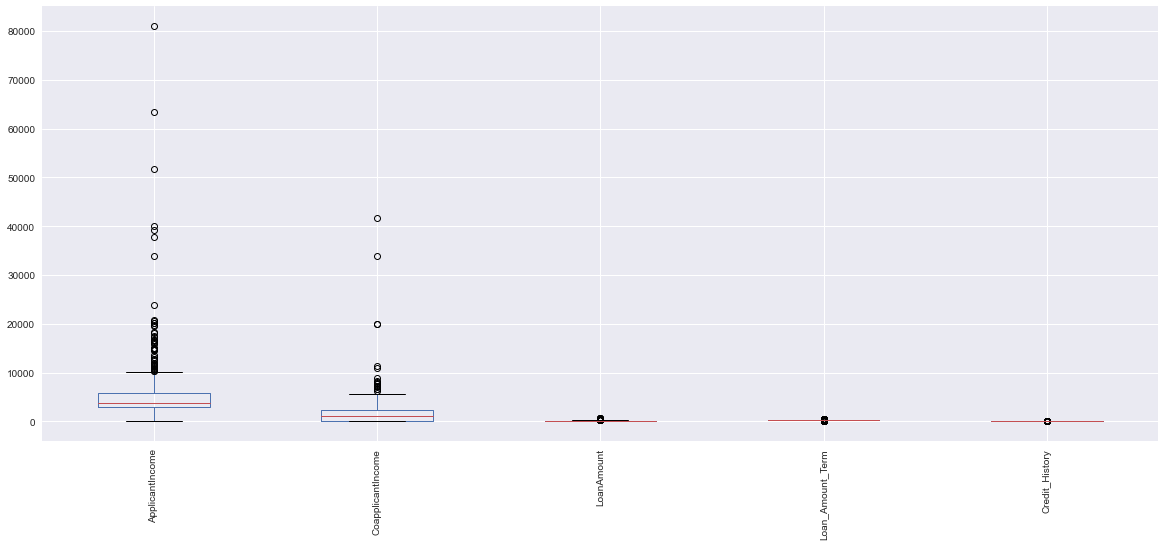

In [648]:
loan[num_features].boxplot( rot = 90, figsize=(20,8))

In [649]:
#from scipy.stats import zscore
#z=np.abs(zscore(loan[num_features]))


In [650]:
#loan_new=loan[(z<3).all(axis=1)]

In [651]:
#loan.shape

In [652]:
#loan_new.shape

In [653]:
loan['LoanAmount']=np.log(loan['LoanAmount'])
loan['TotalIncome']= loan['ApplicantIncome'] +loan['CoapplicantIncome'] 
loan['TotalIncome']=np.log(loan['TotalIncome'])

zscore doesnt performs well for above dataset , using log transform to deal with outliers

In [654]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in category:   
    loan[i] = encoder.fit_transform(loan[i]) 
    
loan.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
dtype: object

Using label encoder to convert string values to numeric values

In [655]:
x = loan.drop(columns=['Loan_ID','Loan_Status'])
y = loan['Loan_Status'] 

splitting data in x and y for performing ML

In [656]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

Scaling data for perfing ML 


In [657]:
print(x.shape)
print(y.shape)

(614, 12)
(614,)


x.isna().sum()

In [658]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [659]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

Performing PCA on training dataset

In [660]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('Random forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression(max_iter=100000)))
models.append(('decision tree', DecisionTreeClassifier()))


# evaluate each model in turn


for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)
    




    msg = "%s:\n Training Score: %f \n Testing Score: %f " % (name,a,b)
    print(msg)
    print('\n')
    print(classification_report(y_test, y_pred))

    sc = cross_val_score(model, x_test, y_test, cv=35)
    acc=accuracy_score(y_test, y_pred)
    

 
   
    print('Cross val score is :',sc.mean())
    print('\n ')
    acc=accuracy_score(y_test, y_pred)
    print('Difference between accuracy score and cross validation score is :',acc-sc.mean())
   
    print('\n --------------------------------------------------------\n')
    

AdaBoost:
 Training Score: 0.867617 
 Testing Score: 0.739837 


              precision    recall  f1-score   support

           0       0.64      0.41      0.50        39
           1       0.77      0.89      0.82        84

    accuracy                           0.74       123
   macro avg       0.70      0.65      0.66       123
weighted avg       0.73      0.74      0.72       123

Cross val score is : 0.6404761904761904

 
Difference between accuracy score and cross validation score is : 0.09936120789779335

 --------------------------------------------------------

GradientBoosting:
 Training Score: 0.932790 
 Testing Score: 0.747967 


              precision    recall  f1-score   support

           0       0.65      0.44      0.52        39
           1       0.77      0.89      0.83        84

    accuracy                           0.75       123
   macro avg       0.71      0.66      0.68       123
weighted avg       0.74      0.75      0.73       123

Cross val score is 

using for loop for testing multiple algorithms 
logistic regression performs best 80% accuracy score

# Hyperparameter Tuning

In [661]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
x,y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Best: 0.813320 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


There is improvement in score after tuning 
the best accuracy score is
 Best: 0.815361 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

0.7008547008547008


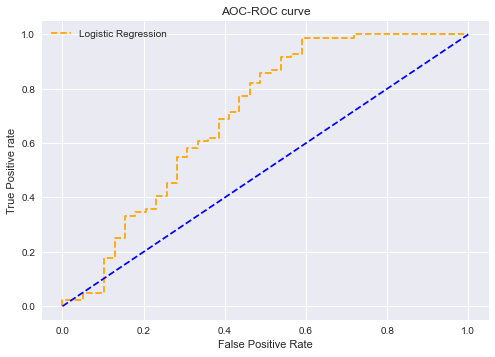

In [662]:

pred_prob1 = grid_search.best_estimator_.predict_proba(x_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]

p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('AOC-ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The above visualization demonstartes AOC-ROC curve for the above dataset

# Saving model

In [663]:
import joblib
joblib.dump(grid_search.best_estimator_,"Loan_ml.obj")

['Loan_ml.obj']